In [1]:
import numpy as np
import matplotlib.pyplot as plt
N=100
X1=np.random.randn(N)
X2=np.random.randn(N)+np.random.randn()
X=np.array([X1,X2]).T

In [2]:
X

array([[-1.22872307,  0.74137632],
       [-0.29293513, -1.25786192],
       [-0.15867376, -0.18081109],
       [ 0.28312001, -1.32720905],
       [-0.55476815, -0.38735128],
       [ 0.11759702, -0.41396035],
       [-0.22587381,  0.10123654],
       [-0.26840018, -1.74699423],
       [ 1.79600085, -0.5586121 ],
       [-1.01296777,  0.50416254],
       [-0.58460802, -2.77841398],
       [ 0.20333143, -1.30295996],
       [-0.43488885,  0.21269128],
       [-0.88528654, -0.98833446],
       [ 2.21268882, -1.99010184],
       [ 0.8516612 ,  0.64955928],
       [ 0.03971971, -2.4446933 ],
       [ 0.24918428, -1.33762823],
       [ 1.03721625,  0.18331429],
       [ 0.59232837, -1.41683391],
       [ 0.97225282,  0.08929193],
       [ 1.21398412, -1.77385656],
       [-0.44507768, -1.49489733],
       [-0.10417445,  0.42174931],
       [-0.05518202, -0.02171735],
       [-0.88088681, -1.62807395],
       [ 1.9652983 , -0.8399694 ],
       [ 0.01944088, -1.78405363],
       [ 0.16812595,

In [3]:
y=X1*X2

In [4]:
y

array([-9.10946195e-01,  3.68471940e-01,  2.86899749e-02, -3.75759445e-01,
        2.14890151e-01, -4.86805058e-02, -2.28666830e-02,  4.68893561e-01,
       -1.00326781e+00, -5.10700405e-01,  1.62428308e+00, -2.64932712e-01,
       -9.24970643e-02,  8.74959193e-01, -4.40347609e+00,  5.53204435e-01,
       -9.71025097e-02, -3.33315934e-01,  1.90136562e-01, -8.39230914e-01,
        8.68143330e-02, -2.15343369e+00,  6.65345434e-01, -4.39355004e-02,
        1.19840723e-03,  1.43414887e+00, -1.65079043e+00, -3.46835688e-02,
       -1.15233620e-01, -3.35078005e-01, -8.22480835e-02, -1.15836759e+00,
       -3.14965763e-01,  1.93809435e-01,  5.02803768e-02, -1.70774643e+00,
        3.64099236e-01, -3.69715999e-01,  3.31406367e-01,  6.28860917e-01,
       -6.42441859e-01,  2.13250082e-01, -2.11694171e-01, -1.13724955e-02,
        1.04707677e-01, -3.12874575e-01, -2.11408339e+00,  1.75769448e+00,
       -1.55126899e-01, -2.10098884e-02, -1.18606119e+00,  7.85298147e-01,
       -6.01307830e-01,  

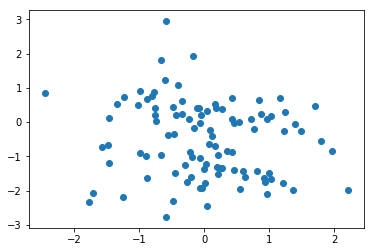

In [5]:
plt.scatter(X1,X2)
plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D

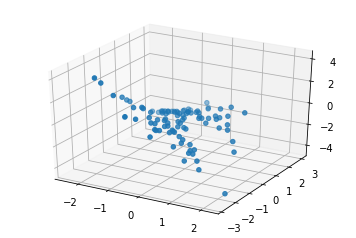

In [7]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X1,X2,y)
plt.show()

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def relu(z):
    return z*(z)
def feed_forward(X,W1,b1,W2,b2):
    z=sigmoid(X.dot(W1)+b1)
    y=z.dot(W2)+b2
    return y,z
def cost(y,y_p):
    J=(y-y_p)**2
    return J.sum()
def r2(y,y_p):
    RSS=(y-y_p)**2
    TSS=(y-y.mean())**2
    return (1-(RSS.sum()/TSS.sum()))
def dW2(y,y_p,z):
    return (y_p-y).dot(z)
def db2(y,y_p):
    return (y_p-y).sum(axis=0)
def dW1(y,y_p,z,W2,X):
    return X.T.dot(np.outer((y_p-y),W2)*z*(1-z))
def db1(y,y_p,z,W2):
    return (np.outer((y_p-y),W2)*z*(1-z)).sum(axis=0)
def train_nn(X,y,W1,b1,W2,b2,lr,epoch):
    c=[]
    r2s=[]
    for i in range(epoch):
        y_p,z=feed_forward(X,W1,b1,W2,b2)
        W2-=lr*dW2(y,y_p,z)
        b2-=lr*db2(y,y_p)
        W1-=lr*dW1(y,y_p,z,W2,X)
        b1-=lr*db1(y,y_p,z,W2)
        c.append(cost(y,y_p))
        r2s.append(r2(y,y_p))
        if i % 100 == 0:
            print('Cost {0} R2: {1}'.format(c[i],r2s[i]))
    return y_p,c,r2s,W1,b1,W2,b2

In [9]:
K=1
M=3
D=2
W1=np.random.randn(D,M)
b1=np.random.randn(M)
W2=np.random.randn(M)
b2=np.random.randn(K)

In [10]:
y_p,c,r2s,W1,b1,W2,b2=train_nn(X,y,W1,b1,W2,b2,0.001,50000)

Cost 238.78879236995346 R2: -1.0081632896458266
Cost 93.67614822883522 R2: 0.21220338642560865
Cost 79.40091329694965 R2: 0.3322550959583944
Cost 67.37900703129051 R2: 0.4333567875187626
Cost 53.472127622623624 R2: 0.5503107049318914
Cost 40.97228001892281 R2: 0.6554317821599609
Cost 31.80506862161458 R2: 0.7325260930519726
Cost 25.547505136082997 R2: 0.7851508797915612
Cost 21.140128364979116 R2: 0.8222159871926498
Cost 17.817762476688163 R2: 0.85015638232351
Cost 15.179926291649808 R2: 0.8723400272857346
Cost 13.036697018526613 R2: 0.890364132625286
Cost 11.288064316570717 R2: 0.9050697641764587
Cost 9.866178312512218 R2: 0.9170275250373104
Cost 8.715052970328482 R2: 0.9267082459413843
Cost 7.78570878990875 R2: 0.9345238341356304
Cost 7.03579628165686 R2: 0.9408304398794398
Cost 6.429705858863706 R2: 0.9459275322730119
Cost 5.938227829069071 R2: 0.9500607586581595
Cost 5.5378236220143835 R2: 0.9534280734372436
Cost 5.209741950111992 R2: 0.9561871709768771
Cost 4.939148860934487 R2: 0

Cost 2.427375627996284 R2: 0.979586283853846
Cost 2.4239346362161904 R2: 0.9796152218676623
Cost 2.4205025834307436 R2: 0.9796440847064223
Cost 2.4170794473038275 R2: 0.979672872557968
Cost 2.4136652064400526 R2: 0.9797015856022302
Cost 2.410259840320702 R2: 0.979730224011767
Cost 2.4068633292431003 R2: 0.9797587879522737
Cost 2.403475654263302 R2: 0.9797872775830648
Cost 2.400096797141889 R2: 0.97981569305753
Cost 2.396726740292715 R2: 0.9798440345235652
Cost 2.39336546673447 R2: 0.9798723021239795
Cost 2.390012960044932 R2: 0.9799004959968803
Cost 2.3866692043176743 R2: 0.9799286162760374
Cost 2.383334184121288 R2: 0.9799566630912255
Cost 2.3800078844607735 R2: 0.9799846365685497
Cost 2.3766902907411573 R2: 0.9800125368307503
Cost 2.3733813887331356 R2: 0.980040363997493
Cost 2.3700811645406685 R2: 0.9800681181856402
Cost 2.3667896045704175 R2: 0.9800957995095094
Cost 2.363506695502917 R2: 0.9801234080811144
Cost 2.360232424265423 R2: 0.980150944010394
Cost 2.3569667780063326 R2: 0.9

Cost 1.9355361753102014 R2: 0.983722549729145
Cost 1.9334573494228402 R2: 0.9837400322156182
Cost 1.9313843593615905 R2: 0.9837574656240269
Cost 1.929317185247293 R2: 0.9837748501215506
Cost 1.9272558072313983 R2: 0.9837921858751114
Cost 1.9252002054967257 R2: 0.9838094730513676
Cost 1.9231503602581728 R2: 0.9838267118167077
Cost 1.9211062517634425 R2: 0.9838439023372444
Cost 1.9190678602937614 R2: 0.9838610447788084
Cost 1.91703516616454 R2: 0.9838781393069429
Cost 1.915008149726085 R2: 0.9838951860868977
Cost 1.9129867913642329 R2: 0.9839121852836239
Cost 1.9109710715010317 R2: 0.9839291370617678
Cost 1.9089609705953543 R2: 0.983946041585666
Cost 1.9069564691435303 R2: 0.9839628990193405
Cost 1.9049575476799676 R2: 0.9839797095264928
Cost 1.9029641867777456 R2: 0.9839964732704991
Cost 1.9009763670492068 R2: 0.9840131904144055
Cost 1.8989940691465235 R2: 0.9840298611209232
Cost 1.8970172737622772 R2: 0.9840464855524235
Cost 1.8950459616299953 R2: 0.9840630638709332
Cost 1.893080113524

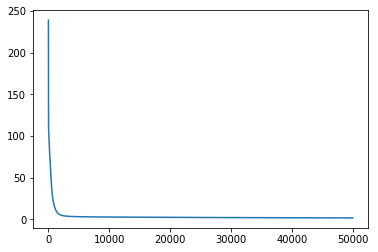

In [11]:
plt.plot(c)
plt.show()

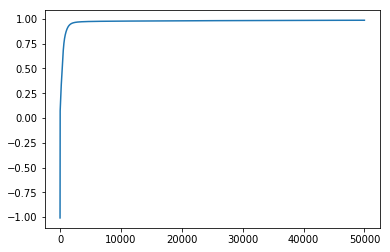

In [12]:
plt.plot(r2s)
plt.show()

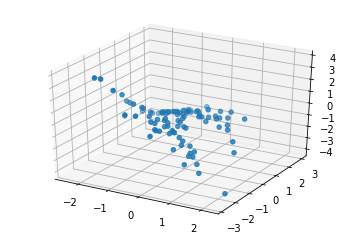

In [13]:
# plot the prediction with the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y_p)
plt.show()

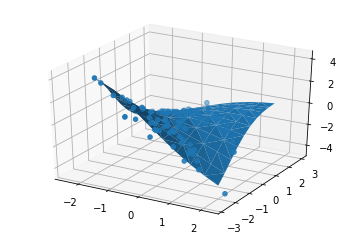

In [14]:
# surface plot
line = np.linspace(-2, 2, 10)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
y_p_grid,z=feed_forward(Xgrid,W1,b1,W2,b2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], y_p_grid, linewidth=0.2, antialiased=True)
plt.show()

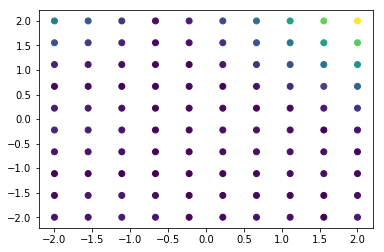

In [15]:
# plot magnitude of residuals
y_grid = Xgrid[:,0]*Xgrid[:,1]
R = np.abs(y_grid - y_p_grid)
plt.scatter(Xgrid[:,0], Xgrid[:,1], c=R)
plt.show()

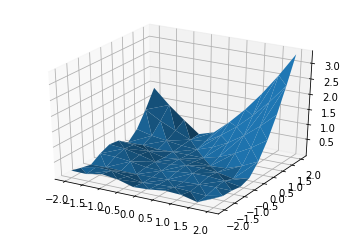

In [16]:
# plot magnitude of residuals
y_grid = Xgrid[:,0]*Xgrid[:,1]
R = np.abs(y_grid - y_p_grid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], R, linewidth=0.2, antialiased=True)
plt.show()